In [1]:
 import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.3.1'
spark_version = 'spark-3.3.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 2s (198 kB/s)
Reading package lists... Done


In [2]:
# Import packages
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField, StringType, DateType, IntegerType
from pyspark import SparkFiles

# Create a SparkSession
spark = SparkSession.builder.appName("TempViews").getOrCreate()


In [3]:
url = 'https://project-4-nba.s3.amazonaws.com/2022_2023_NBA_Player_Stats_Transformed.csv'

url2 = 'https://nba2021data.s3.amazonaws.com/2021_2022_NBA_Player_Stats_Transformed.csv'

In [4]:
 # SparkFiles will allow you to resolves paths to files added through `SparkContext.addFile`

spark.sparkContext.addFile(url)

spark.sparkContext.addFile(url2)

data2 = spark.read.option('header', 'true').option("encoding", "utf-8").csv(SparkFiles.get("2022_2023_NBA_Player_Stats_Transformed.csv"), inferSchema=True, sep=',')

data3 = spark.read.option('header', 'true').option("encoding", "utf-8").csv(SparkFiles.get("2021_2022_NBA_Player_Stats_Transformed.csv"), inferSchema=True, sep=';')


# Show DataFrame
data2.show()

+---+--------------------+---+---+---+---+---+----+----+----+-----+---+---+-----+----+----+-----+-----+---+----+-----+---+---+----+---+---+---+---+---+----+
| Rk|              Player|Pos|Age| Tm|  G| GS|  MP|  FG| FGA|  FG%| 3P|3PA|  3P%|  2P| 2PA|  2P%| eFG%| FT| FTA|  FT%|ORB|DRB| TRB|AST|STL|BLK|TOV| PF| PTS|
+---+--------------------+---+---+---+---+---+----+----+----+-----+---+---+-----+----+----+-----+-----+---+----+-----+---+---+----+---+---+---+---+---+----+
|  1|    Precious Achiuwa|  C| 23|TOR| 55| 12|20.7| 3.6| 7.3|0.485|0.5|2.0|0.269| 3.0| 5.4|0.564|0.521|1.6| 2.3|0.702|1.8|4.1| 6.0|0.9|0.6|0.5|1.1|1.9| 9.2|
|  2|        Steven Adams|  C| 29|MEM| 42| 42|27.0| 3.7| 6.3|0.597|0.0|0.0|  0.0| 3.7| 6.2|0.599|0.597|1.1| 3.1|0.364|5.1|6.5|11.5|2.3|0.9|1.1|1.9|2.3| 8.6|
|  3|         Bam Adebayo|  C| 25|MIA| 75| 75|34.6| 8.0|14.9| 0.54|0.0|0.2|0.083| 8.0|14.7|0.545|0.541|4.3| 5.4|0.806|2.5|6.7| 9.2|3.2|1.2|0.8|2.5|2.8|20.4|
|  4|        Ochai Agbaji| SG| 22|UTA| 59| 22|20.5| 2.8| 6

In [5]:
data3.show()

+---+--------------------+---+---+---+---+---+----+----+----+-----+---+---+-----+---+----+-----+-----+---+----+-----+---+---+----+---+---+---+---+---+----+
| Rk|              Player|Pos|Age| Tm|  G| GS|  MP|  FG| FGA|  FG%| 3P|3PA|  3P%| 2P| 2PA|  2P%| eFG%| FT| FTA|  FT%|ORB|DRB| TRB|AST|STL|BLK|TOV| PF| PTS|
+---+--------------------+---+---+---+---+---+----+----+----+-----+---+---+-----+---+----+-----+-----+---+----+-----+---+---+----+---+---+---+---+---+----+
|  1|    Precious Achiuwa|  C| 22|TOR| 73| 28|23.6| 3.6| 8.3|0.439|0.8|2.1|0.359|2.9| 6.1|0.468|0.486|1.1| 1.8|0.595|2.0|4.5| 6.5|1.1|0.5|0.6|1.2|2.1| 9.1|
|  2|        Steven Adams|  C| 28|MEM| 76| 75|26.3| 2.8| 5.1|0.547|0.0|0.0|  0.0|2.8| 5.0|0.548|0.547|1.4| 2.6|0.543|4.6|5.4|10.0|3.4|0.9|0.8|1.5|2.0| 6.9|
|  3|         Bam Adebayo|  C| 24|MIA| 56| 56|32.6| 7.3|13.0|0.557|0.0|0.1|  0.0|7.3|12.9|0.562|0.557|4.6| 6.1|0.753|2.4|7.6|10.1|3.4|1.4|0.8|2.6|3.1|19.1|
|  4|        Santi Aldama| PF| 21|MEM| 32|  0|11.3| 1.7| 4.1|0.4

In [6]:
pandas_df = data2.toPandas()

In [7]:
pandas2_df = data3.toPandas()

In [8]:
pandas_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [9]:
pandas2_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [10]:
pandas2_df = pandas2_df.rename(columns = {' Age': 'Age'})

pandas2_df = pandas2_df.rename(columns = {'Player ': 'Player'})

In [11]:
print(pandas_df.columns)
print(pandas2_df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [12]:
joined_data = pandas_df.merge(pandas2_df, on='Player', how='outer')

In [13]:
joined_data.columns

Index(['Rk_x', 'Player', 'Pos_x', 'Age_x', 'Tm_x', 'G_x', 'GS_x', 'MP_x',
       'FG_x', 'FGA_x', 'FG%_x', '3P_x', '3PA_x', '3P%_x', '2P_x', '2PA_x',
       '2P%_x', 'eFG%_x', 'FT_x', 'FTA_x', 'FT%_x', 'ORB_x', 'DRB_x', 'TRB_x',
       'AST_x', 'STL_x', 'BLK_x', 'TOV_x', 'PF_x', 'PTS_x', 'Rk_y', 'Pos_y',
       'Age_y', 'Tm_y', 'G_y', 'GS_y', 'MP_y', 'FG_y', 'FGA_y', 'FG%_y',
       '3P_y', '3PA_y', '3P%_y', '2P_y', '2PA_y', '2P%_y', 'eFG%_y', 'FT_y',
       'FTA_y', 'FT%_y', 'ORB_y', 'DRB_y', 'TRB_y', 'AST_y', 'STL_y', 'BLK_y',
       'TOV_y', 'PF_y', 'PTS_y'],
      dtype='object')

In [14]:
joined_data.dropna(inplace = True)

In [15]:
joined_data[['Age_x']]

,Age_x
0,23.0
1,29.0
2,25.0
4,22.0
5,24.0
...,...
829,34.0
830,24.0
831,24.0
832,30.0


In [16]:
joined_data[['Age_y']]

,Age_y
0,22.0
1,28.0
2,24.0
4,21.0
5,23.0
...,...
829,33.0
830,23.0
831,23.0
832,29.0


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from pyspark.sql.functions import col
import numpy as np

In [18]:
# Select the features (X) and target variables (y) for points (PTS) and assists (AST)
features = joined_data[['Age_x', 'G_x', 'GS_x', 'MP_x', 'FG_x', 'FGA_x',
                       'Age_y', 'G_y', 'GS_y', 'MP_y', 'FG_y', 'FGA_y']]

target_pts = joined_data[['PTS_x']]

target_ast = joined_data[['AST_x']]



In [19]:
# Split the data into training and test sets
X_train, X_test, y_train_pts, y_test_pts, y_train_ast, y_test_ast = train_test_split(features, target_pts, target_ast, test_size=0.4, random_state=42)

In [20]:
# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model to the training data for points
rf.fit(X_train, y_train_pts.values.ravel())

# Get the feature importances for points
feature_importances_pts = rf.feature_importances_

# Fit the model to the training data for assists
rf.fit(X_train, y_train_ast.values.ravel())

# Get the feature importances for assists
feature_importances_ast = rf.feature_importances_

# Average the feature importances for both targets
average_feature_importances = (feature_importances_pts + feature_importances_ast) / 2

# Sort the features based on importance
sorted_indices = average_feature_importances.argsort()[::-1]

# Get the names of the selected features
selected_features = features.columns[sorted_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['FG_x', 'FGA_x', 'MP_x', 'FGA_y', 'MP_y', 'Age_x', 'G_x', 'Age_y',
       'G_y', 'GS_x', 'FG_y', 'GS_y'],
      dtype='object')


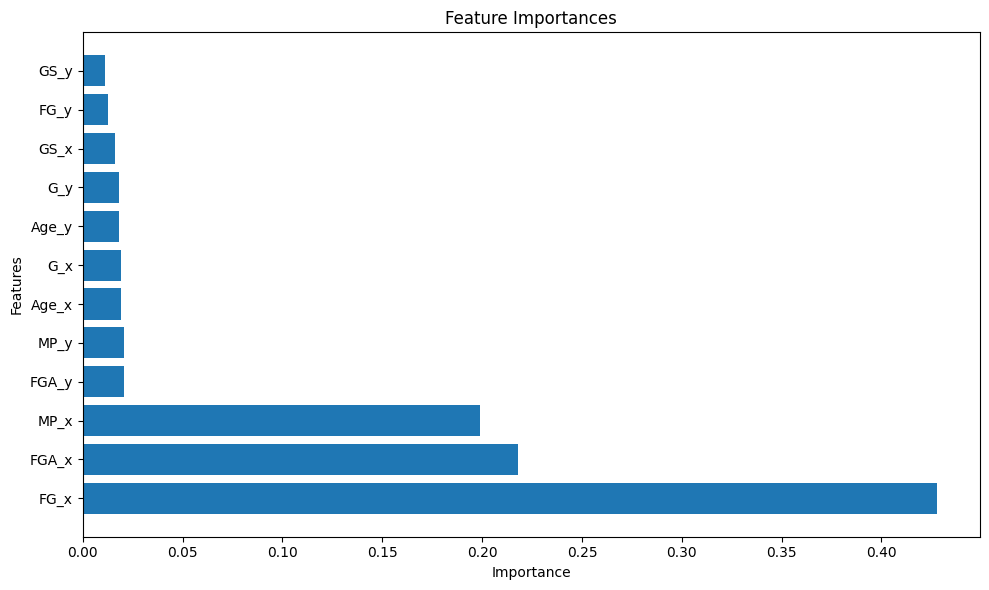

In [21]:
import matplotlib.pyplot as plt

# Sort the features and importances in descending order
sorted_features = features.columns[sorted_indices]
sorted_importances = average_feature_importances[sorted_indices]

# Plot the horizontal bar chart
plt.figure(figsize=(10, len(sorted_features) * 0.5))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [22]:
# Create separate models for points and assists
model_pts = LinearRegression()

model_ast = LinearRegression()


# Train the models
model_pts.fit(X_train, y_train_pts)

model_ast.fit(X_train, y_train_ast)

LinearRegression()

In [23]:
full_set = pd.concat([X_train, X_test])

In [24]:
full_set.columns

Index(['Age_x', 'G_x', 'GS_x', 'MP_x', 'FG_x', 'FGA_x', 'Age_y', 'G_y', 'GS_y',
       'MP_y', 'FG_y', 'FGA_y'],
      dtype='object')

In [25]:
# Make predictions for points and assists
pts_predictions = model_pts.predict(full_set)

ast_predictions = model_ast.predict(full_set)


In [26]:
player_names = joined_data['Player'].unique()

print(player_names)

['Precious Achiuwa' 'Steven Adams' 'Bam Adebayo' 'Santi Aldama'
 'Nickeil Alexander-Walker' 'Grayson Allen' 'Jarrett Allen'
 'Jose Alvarado' 'Kyle Anderson' 'Giannis Antetokounmpo'
 'Thanasis Antetokounmpo' 'Cole Anthony' 'OG Anunoby' 'Ryan Arcidiacono'
 'Deni Avdija' 'Deandre Ayton' 'Udoka Azubuike' 'Marvin Bagley III'
 'LaMelo Ball' 'Mo Bamba' 'Desmond Bane' 'Dalano Banton' 'Harrison Barnes'
 'Scottie Barnes' 'RJ Barrett' 'Will Barton' 'Charles Bassey'
 'Keita Bates-Diop' 'Nicolas Batum' 'Darius Bazley' 'Bradley Beal'
 'Malik Beasley' 'D?vis Bert?ns' 'Patrick Beverley' 'Saddiq Bey'
 'Khem Birch' 'Goga Bitadze' 'Bismack Biyombo' 'Bogdan Bogdanovi?'
 'Bojan Bogdanovi?' 'Bol Bol' 'Leandro Bolmaro' 'Devin Booker'
 'Brandon Boston Jr.' 'Chris Boucher' 'James Bouknight' 'Tony Bradley'
 'Mikal Bridges' 'Oshae Brissett' 'Malcolm Brogdon' 'Dillon Brooks'
 'Bruce Brown' 'Greg Brown III' 'Jaylen Brown' 'Moses Brown'
 'Sterling Brown' 'Troy Brown Jr.' 'Jalen Brunson' 'Thomas Bryant'
 'Reggie Bul

In [27]:
# Print the actual and predicted points and assists for a sample player
player_name = input("Enter the player's name: ")
player_row = joined_data[joined_data['Player'] == player_name]
player_features = player_row[['Age_x', 'G_x', 'GS_x', 'MP_x', 'FG_x', 'FGA_x',
                       'Age_y', 'G_y', 'GS_y', 'MP_y', 'FG_y', 'FGA_y']]


Enter the player's name: Myles Turner


In [28]:
# Get the actual points and assists for the player
pts_actual = player_row[['PTS_x']].values[0]
ast_actual = player_row[['AST_x']].values[0]

# Predict points and assists for the player
pts_predicted = model_pts.predict(player_features)[0]
ast_predicted = model_ast.predict(player_features)[0]

print("Player:", player_name)
print("2022-2023 Points:", pts_actual)
print("2023-2024 Predicted Points:", pts_predicted)
print("2022-2023 Assists:", ast_actual)
print("2023-2024 Predicted Assists:", ast_predicted)


Player: Myles Turner
2022-2023 Points: [18.]
2023-2024 Predicted Points: [17.45912529]
2022-2023 Assists: [1.4]
2023-2024 Predicted Assists: [3.45871414]


In [29]:
joined_data = joined_data.rename(columns={
    'Age_x': 'Age_2022-2023',
    'G_x': 'G_2022-2023',
    'GS_x': 'GS_2022-2023',
    'MP_x': 'MP_2022-2023',
    'FG_x': 'FG_2022-2023',
    'FGA_x': 'FGA_2022-2023',
    'Age_y': 'Age_2021-2022',
    'G_y': 'G_2021-2022',
    'GS_y': 'GS_2021-2022',
    'MP_y': 'MP_2021-2022',
    'FG_y': 'FG_2021-2022',
    'FGA_y': 'FGA_2021-2022'
})

In [30]:
# Create a copy of pandas_df
pandas_df_with_predictions = joined_data.copy()

# Add the predictions as new columns
pandas_df_with_predictions['2023-2024 Predicted Points'] = pts_predictions[:, 0]
pandas_df_with_predictions['2023-2024 Predicted Assists'] = ast_predictions[:, 0]

# Specify the path where you want to save the file
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Predicted_Data_Updated.csv'

# Save the DataFrame as a CSV file
pandas_df_with_predictions.to_csv(file_path, encoding='utf-8', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
